In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import all required libraries

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image
init_notebook_mode(connected=True)
%matplotlib inline

# machine learning
import surprise
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans

!pip install kaleido

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00


In [2]:
# load the movies rating data (small)
rating_df = pd.read_csv("../input/the-movies-dataset/ratings_small.csv")

In [3]:
# check the raw data
rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
print("Dimension of the data: ", rating_df.shape)

Dimension of the data:  (100004, 4)


In [5]:
# summary of the data
rating_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [6]:
# load the data into surprise specific data-structure
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)

In [7]:
# default setting: distance MSD, k=10
benchmark = []

# iterate over all algorithms
for algorithm in [SVD(biased=False), KNNBasic(sim_options = {'user_based': True }), KNNBasic(sim_options = {'user_based': False})]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    benchmark.append(tmp)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0066  1.0051  1.0079  1.0159  1.0063  1.0084  0.0039  
MAE (testset)     0.7780  0.7747  0.7778  0.7841  0.7793  0.7788  0.0031  
Fit time          6.96    6.65    6.37    6.35    7.63    6.79    0.47    
Test time         0.20    0.37    0.29    0.18    0.33    0.27    0.07    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9691  0.9600  0.9653  0.9611  0.9775  0.9666  0.0063

In [8]:
benchmark = pd.DataFrame(benchmark)

In [9]:
# udpate algrithm names 
new_algorithms = ['PMF','UserCF','ItemCF']
benchmark['Algorithm'] = new_algorithms

benchmark

,test_rmse,test_mae,fit_time,test_time,Algorithm
0,1.008379,0.778779,6.790346,0.273234,PMF
1,0.966611,0.742901,0.244098,2.050482,UserCF
2,0.934764,0.721309,6.706625,10.550929,ItemCF


In [10]:
benchmark2 = []

# iterate over all algorithms
for algorithm in [KNNBasic(sim_options = {'name':'cosine','user_based': True}), KNNBasic(sim_options = {'name':'MSD', 'user_based':True }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': True}),
                 KNNBasic(sim_options = {'name':'cosine', 'user_based':False }),KNNBasic(sim_options = {'name':'MSD', 'user_based':False }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': False}) 
                 ]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    benchmark2.append(tmp)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [11]:
benchmark2 = pd.DataFrame(benchmark2)

In [12]:
# udpate algorithm names 
new_algorithms2 = ['Cosine-UserCF','MSD-UserCF','Pearson-UserCF','Cosine-ItemCF','MSD-ItemCF','Pearson-ItemCF']
benchmark2['Algorithm'] = new_algorithms2

# store results
results2 = benchmark2.set_index('Algorithm').sort_values('test_rmse', ascending=False)
results2

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
Pearson-UserCF,0.998116,0.772638,0.702471,2.001863
Cosine-ItemCF,0.995659,0.774976,20.521248,9.793159
Cosine-UserCF,0.993968,0.768239,0.512294,2.025649
Pearson-ItemCF,0.989018,0.767845,27.688312,10.169672
MSD-UserCF,0.968291,0.744513,0.257499,2.157526
MSD-ItemCF,0.935090,0.721387,7.139881,10.297349


In [13]:
# plotting the results

# prepare the data for plotting
data = results2[['test_rmse', 'test_mae']]
grid = data.values

# create axis labels
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'




In [14]:
# get annotations and hovertext
hovertexts = []
annotations = []

for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.4f}{}: {}{}: {} Fit Time: {:.3f}s Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value,
                   results2.loc[y_value]['fit_time'],
                   results2.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.4f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)



In [15]:
# create trace
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Cross-validated Comparison of Algorithms',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)



In [16]:
# Create plot
fig = go.Figure(data=[trace], layout=layout)
import plotly.io as pio
pio.show(fig)

In [17]:
# load the data into surprise specific data-structure format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)

In [18]:
# User-based Collaborative Filtering: optimal k
benchmark_ucf = []

for i in range(1,30):
    # perform cross validation
    algorithm =KNNBasic(k=i, sim_options = {'name':'MSD','user_based': True})
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
       
    # Store data
    benchmark_ucf.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [19]:
# Item-based Collaborative Filtering: optimal k
benchmark_icf = []

for i in range(1,30):
    # perform cross validation
    algorithm = KNNBasic(k=i, sim_options = {'name':'MSD','user_based': False})
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        
    # Store data
    benchmark_icf.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [20]:
benchmark_ucf = pd.DataFrame(benchmark_ucf)
benchmark_icf = pd.DataFrame(benchmark_icf)

acc_userCF1 = benchmark_ucf['test_rmse']
acc_itemCF1 = benchmark_icf['test_rmse']

acc_userCF2 = benchmark_ucf['test_mae']
acc_itemCF2 = benchmark_icf['test_mae']

In [21]:
acc_itemCF1

0     1.300098
1     1.139410
2     1.075851
3     1.045232
4     1.022071
5     1.006643
6     0.997246
7     0.987126
8     0.980874
9     0.977687
10    0.970604
11    0.968934
12    0.963415
13    0.960746
14    0.959572
15    0.956142
16    0.955376
17    0.954109
18    0.953006
19    0.951432
20    0.950196
21    0.949193
22    0.948320
23    0.947965
24    0.947614
25    0.944866
26    0.944530
27    0.945228
28    0.943247
Name: test_rmse, dtype: float64

In [22]:
acc_userCF1

0     1.226991
1     1.086877
2     1.036119
3     1.013121
4     0.998037
5     0.990750
6     0.987172
7     0.982231
8     0.980886
9     0.979415
10    0.975083
11    0.976480
12    0.975136
13    0.975222
14    0.975400
15    0.974632
16    0.972727
17    0.974723
18    0.975148
19    0.975084
20    0.977198
21    0.974919
22    0.974796
23    0.976282
24    0.976940
25    0.977268
26    0.976816
27    0.974680
28    0.975276
Name: test_rmse, dtype: float64

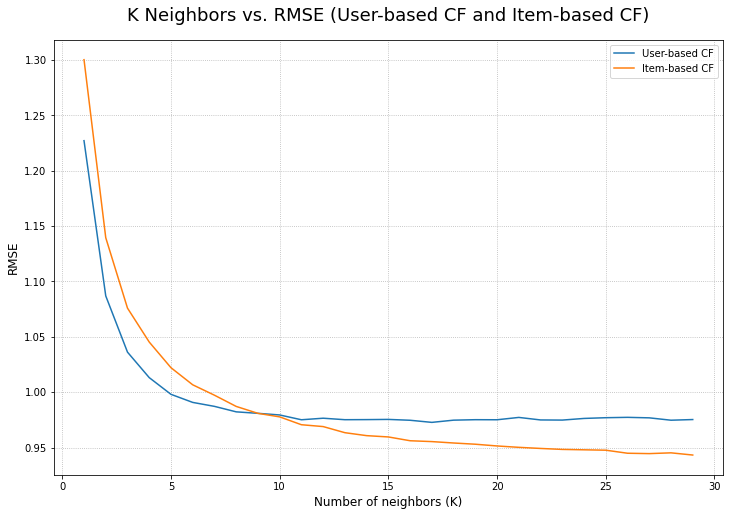

In [23]:
# plotting the results (RMSE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF1, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF1, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. RMSE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (RMSE).png", dpi=300)

plt.show()

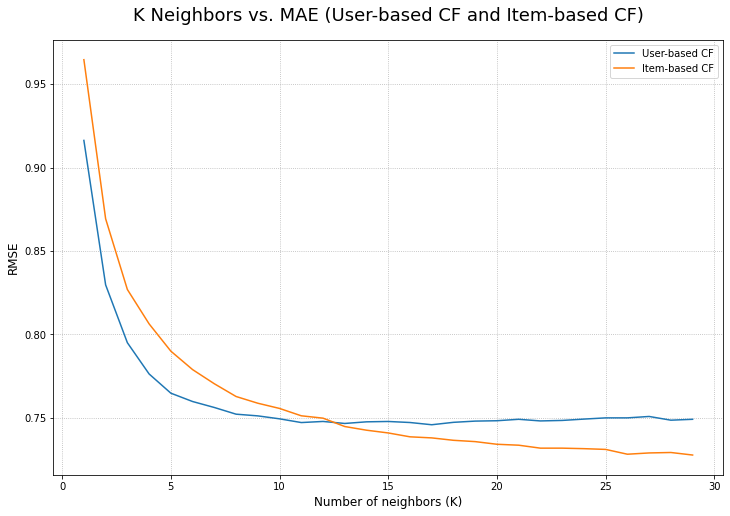

In [24]:
# plotting the results (MAE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF2, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF2, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. MAE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (MAE).png", dpi=300)

plt.show()

In [25]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of RMSE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF1.idxmin()+1, "with minimum RMSE:", min(acc_userCF1))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF1.idxmin()+1 , "with minimum RMSE:", min(acc_itemCF1))

For User-based CF, the best number of neighbor (K) is at K = 17 with minimum RMSE: 0.972726858128544
For Item-based CF, the best number of neighbor (K) is at K = 29 with minimum RMSE: 0.9432473353758022


In [26]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of MAE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF2.idxmin()+1, "with minimum MAE:", min(acc_userCF2))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF2.idxmin()+1 , "with minimum MAE:", min(acc_itemCF2))

For User-based CF, the best number of neighbor (K) is at K = 17 with minimum MAE: 0.7458472636445651
For Item-based CF, the best number of neighbor (K) is at K = 29 with minimum MAE: 0.727692654188098
